# 一、决策树
参考信息：https://zh.wikipedia.org/wiki/%E5%86%B3%E7%AD%96%E6%A0%91

### 1.1 特征工程

In [1]:
import pandas as pd
df = pd.read_csv('../data/qualitydata_3/jmt0718withGeoLocation_clean_map.csv', index_col='ID')
df.head()

FileNotFoundError: File b'../data/qualitydata_3/jmt0718withGeoLocation_clean_map.csv' does not exist

In [16]:
print df.groupby('USERJMT_DIS').count()

             CONFID   HOUR  TIMESTAMP  USERTYPE  PLATFORM  REGISTER  \
USERJMT_DIS                                                           
0             18351  18351      18351     18351     18351     18351   
1             41689  41689      41689     41689     41689     41689   
2             80132  80132      80132     80132     80132     80132   

             STARTJOINTIME  JOINEDTIME  CUSTOMERPCIP  CUSTOMERGWIP  GATEWAYIP  \
USERJMT_DIS                                                                     
0                    18351       18351         18351         18351      18351   
1                    41689       41689         41689         41689      41689   
2                    80132       80132         80132         80132      80132   

             REFNUM6  USEROS  USERBROWSER  DOWNLOADMETHOD  SERVICETYPE  \
USERJMT_DIS                                                              
0              18351   18351        18351           18351        18351   
1              4

In [17]:
# 类别特征进行二值化编码
dummies_HOUR = pd.get_dummies(df['HOUR'], prefix= 'HOUR')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix= 'USERTYPE')
dummies_PLATFORM = pd.get_dummies(df['PLATFORM'], prefix= 'PLATFORM')
# dummies_REGISTER = pd.get_dummies(df['REGISTER'], prefix= 'REGISTER')
dummies_REFNUM6 = pd.get_dummies(df['REFNUM6'], prefix= 'REFNUM6')
dummies_USEROS = pd.get_dummies(df['USEROS'], prefix= 'USEROS')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix= 'USERBROWSER')
dummies_DOWNLOADMETHOD = pd.get_dummies(df['DOWNLOADMETHOD'], prefix= 'DOWNLOADMETHOD')
dummies_SERVICETYPE = pd.get_dummies(df['SERVICETYPE'], prefix= 'SERVICETYPE')
dummies_COUNTRY = pd.get_dummies(df['COUNTRY'], prefix= 'COUNTRY')
dummies_REGION = pd.get_dummies(df['REGION'], prefix= 'REGION')
dummies_CITY = pd.get_dummies(df['CITY'], prefix= 'CITY')
dummies_MACHINE_TYPE = pd.get_dummies(df['MACHINE_TYPE'], prefix= 'MACHINE_TYPE')


jmt_feature = pd.concat([dummies_HOUR, dummies_USERTYPE, dummies_PLATFORM,df['REGISTER'],dummies_REFNUM6,dummies_USEROS,dummies_USERBROWSER,dummies_DOWNLOADMETHOD,dummies_SERVICETYPE,dummies_COUNTRY,dummies_REGION,dummies_CITY,dummies_MACHINE_TYPE], axis=1)
jmt_target = df.loc[:,['USERJMT_DIS']]

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print jmt_feature.shape

(140172, 107)


In [18]:
# 把数据集随机拆为训练集和测试集

from sklearn.cross_validation import train_test_split
jmt_sample_train, jmt_sample_test, jmt_target_train, jmt_target_test = train_test_split(jmt_feature, jmt_target, test_size=0.25, random_state=1)

### 1.2 训练以及可视化
参数介绍：http://www.cnblogs.com/pinard/p/6056319.html

In [44]:
# 转化为numpy数据格式，输入决策树训练. entropy 为信息增益
from sklearn.tree import DecisionTreeClassifier

jmt_DTC=DecisionTreeClassifier(criterion='gini',max_depth=7)
jmt_DTC=jmt_DTC.fit(jmt_sample_train, jmt_target_train)
print jmt_sample_train.columns.values

['HOUR_0' 'HOUR_1' 'HOUR_2' 'HOUR_3' 'HOUR_4' 'HOUR_5' 'HOUR_6' 'HOUR_7'
 'HOUR_8' 'HOUR_9' 'HOUR_10' 'HOUR_11' 'HOUR_12' 'HOUR_13' 'HOUR_14'
 'HOUR_15' 'HOUR_16' 'HOUR_17' 'HOUR_18' 'HOUR_19' 'HOUR_20' 'HOUR_21'
 'HOUR_22' 'HOUR_23' 'USERTYPE_New' 'USERTYPE_Return' 'USERTYPE_Update'
 'PLATFORM_0' 'PLATFORM_1' 'PLATFORM_4' 'PLATFORM_7' 'PLATFORM_10'
 'PLATFORM_12' 'PLATFORM_13' 'PLATFORM_15' 'REGISTER' 'REFNUM6_0'
 'REFNUM6_2' 'REFNUM6_8' 'REFNUM6_15' 'REFNUM6_16' 'REFNUM6_17'
 'REFNUM6_22' 'REFNUM6_28' 'REFNUM6_41' 'REFNUM6_43' 'REFNUM6_45'
 'REFNUM6_51' 'USEROS_Android 9.12' 'USEROS_Other' 'USEROS_Windows 10'
 'USEROS_Windows 7' 'USEROS_Windows 8.1' 'USEROS_iOS'
 'USEROS_intel mac os x 10.10' 'USEROS_intel mac os x 10.11'
 'USEROS_intel mac os x 10.12' 'USEROS_intel mac os x 10.6'
 'USERBROWSER_Android 9.12.0.19120114.19120114' 'USERBROWSER_Chrome 10'
 'USERBROWSER_Chrome 51' 'USERBROWSER_Chrome 58' 'USERBROWSER_Chrome 59'
 'USERBROWSER_Firefox 54' 'USERBROWSER_IE 11.0' 'USERBROWSER_

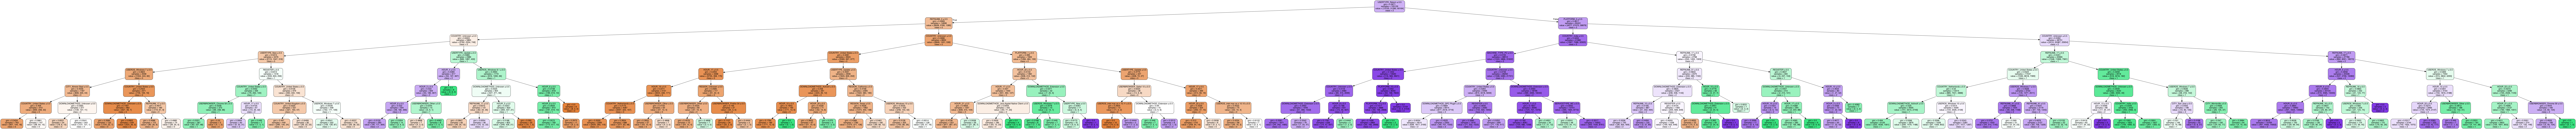

In [45]:
# 结果展示
from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydotplus


dot_data = StringIO() 
tree.export_graphviz(jmt_DTC, out_file=dot_data, 
  feature_names = ['HOUR_0','HOUR_1','HOUR_2','HOUR_3','HOUR_4','HOUR_5','HOUR_6','HOUR_7',
 'HOUR_8','HOUR_9','HOUR_10','HOUR_11','HOUR_12','HOUR_13','HOUR_14',
 'HOUR_15','HOUR_16','HOUR_17','HOUR_18','HOUR_19','HOUR_20','HOUR_21',
 'HOUR_22','HOUR_23','USERTYPE_New','USERTYPE_Return','USERTYPE_Update',
 'PLATFORM_0','PLATFORM_1','PLATFORM_4','PLATFORM_7','PLATFORM_10',
 'PLATFORM_12','PLATFORM_13','PLATFORM_15','REGISTER','REFNUM6_0',
 'REFNUM6_2','REFNUM6_8','REFNUM6_15','REFNUM6_16','REFNUM6_17',
 'REFNUM6_22','REFNUM6_28','REFNUM6_41','REFNUM6_43','REFNUM6_45',
 'REFNUM6_51','USEROS_Android 9.12','USEROS_Other','USEROS_Windows 10',
 'USEROS_Windows 7','USEROS_Windows 8.1','USEROS_iOS',
 'USEROS_intel mac os x 10.10','USEROS_intel mac os x 10.11',
 'USEROS_intel mac os x 10.12','USEROS_intel mac os x 10.6',
 'USERBROWSER_Android 9.12.0.19120114.19120114','USERBROWSER_Chrome 10',
 'USERBROWSER_Chrome 51','USERBROWSER_Chrome 58','USERBROWSER_Chrome 59',
 'USERBROWSER_Firefox 54','USERBROWSER_IE 11.0','USERBROWSER_IE 6.0',
 'USERBROWSER_Other','USERBROWSER_Safari 10','DOWNLOADMETHOD_ActiveX',
 'DOWNLOADMETHOD_Extension','DOWNLOADMETHOD_GPC Plugin',
 'DOWNLOADMETHOD_Java Applet Native Client','DOWNLOADMETHOD_TFS',
 'DOWNLOADMETHOD_Unknown','SERVICETYPE_EC','SERVICETYPE_MC',
 'SERVICETYPE_SC','SERVICETYPE_TC','SERVICETYPE_UNKNOWN',
 'COUNTRY_Australia','COUNTRY_Hong Kong','COUNTRY_India',
 'COUNTRY_Netherlands','COUNTRY_Other','COUNTRY_Singapore',
 'COUNTRY_United Kingdom','COUNTRY_United States','COUNTRY_Unknown',
 'REGION_California',
 'REGION_Central Singapore Community Development Council',
 'REGION_Karnataka','REGION_North Carolina','REGION_Other',
 'REGION_Provincie Flevoland','REGION_Texas','REGION_Unknown',
 'CITY_Almere Stad','CITY_Bengaluru','CITY_Morrisville','CITY_Other',
 'CITY_San Francisco','CITY_San Jose','CITY_Singapore','CITY_Unknown',
 'MACHINE_TYPE_Moblie','MACHINE_TYPE_Other','MACHINE_TYPE_PC'],
                    class_names=['0','1','2'],  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 1.3 预测以及评估

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
# 决策树分类准确率计算
jmt_predict_test = jmt_DTC.predict(jmt_sample_test)
print accuracy_score(jmt_target_test, jmt_predict_test)

0.732300316754


In [48]:
confusion = confusion_matrix(jmt_target_test, jmt_predict_test)
print confusion
# 混淆矩阵C 如下定义，对于第i行，第j列的元素C(i,j)表示正确分类为 group_i 类，实际预测为 group_j类。
# 也就是说，列表示预测的类别。行表示实际类别。
# 详细可见：http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

[[ 2989   799   858]
 [  707  4636  5086]
 [  223  1708 18037]]


In [49]:
print '每个分类的准确率、召回率、f1-score'
print classification_report(jmt_target_test, jmt_predict_test, target_names=['0', '1', '2']) 

每个分类的准确率、召回率、f1-score
             precision    recall  f1-score   support

          0       0.76      0.64      0.70      4646
          1       0.65      0.44      0.53     10429
          2       0.75      0.90      0.82     19968

avg / total       0.72      0.73      0.72     35043



### 1.4 模型解释

In [50]:
import numpy as np

print "输出类别：", jmt_DTC.classes_
print "最重要特征：",np.max(jmt_DTC.feature_importances_)
print "特征重要性：\n",jmt_DTC.feature_importances_

输出类别： [0 1 2]
最重要特征： 0.425834350928
特征重要性：
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.25313865e-04   3.98925676e-03   3.31090539e-03   9.62959977e-04
   1.83440989e-04   2.95859606e-03   2.55653083e-04   0.00000000e+00
   0.00000000e+00   2.01893629e-03   0.00000000e+00   1.01875715e-04
   0.00000000e+00   8.31621908e-04   0.00000000e+00   1.13814393e-04
   1.15799177e-04   1.60106727e-03   3.11754516e-03   6.16187392e-05
   8.09876348e-03   4.25834351e-01   1.11906411e-02   1.39999049e-01
   4.98882950e-04   0.00000000e+00   0.00000000e+00   8.46041721e-04
   1.69699233e-04   0.00000000e+00   0.00000000e+00   4.71412493e-03
   2.56543961e-02   0.00000000e+00   0.00000000e+00   1.56282346e-04
   2.44485458e-04   8.61629957e-02   0.00000000e+00   0.00000000e+00
   9.47910951e-04   0.00000000e+00   0.00000000e+00   5.76187597e-04
   0.00000000e+00   0.00000000e+00   1.28975202e-03   1.01258249e-02
   2.53437909e-03   0.00000000e+00   4.08971144e-05   9.9850

In [53]:
# DT作为基模型的特征选择
from sklearn.feature_selection import SelectFromModel
feature_importances = SelectFromModel(DecisionTreeClassifier()).fit_transform(jmt_sample_train, jmt_target_train)

In [55]:
print type(feature_importances)
print feature_importances.shape
print feature_importances

<type 'numpy.ndarray'>
(105129, 13)
[[1 0 1 ..., 0 1 1]
 [1 0 1 ..., 0 1 1]
 [0 1 1 ..., 0 1 1]
 ..., 
 [1 0 1 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 1 1]]


In [98]:
print 'HOUR 值长度：          ',len(df_sample_trans['HOUR'].value_counts())
print 'REGISTER 值长度：      ',len(df_sample_trans['REGISTER'].value_counts())
print 'USERTYPE 值长度：      ',len(df_sample_trans['USERTYPE'].value_counts())
print 'PLATFORM 值长度：      ',len(df_sample_trans['PLATFORM'].value_counts())
print 'REFNUM6 值长度：       ',len(df_sample_trans['REFNUM6'].value_counts())
print 'USEROS 值长度：        ',len(df_sample_trans['USEROS'].value_counts())
print 'USERBROWSER 值长度：   ',len(df_sample_trans['USERBROWSER'].value_counts())
print 'DOWNLOADMETHOD 值长度：',len(df_sample_trans['DOWNLOADMETHOD'].value_counts())
print 'SERVICETYPE 值长度：   ',len(df_sample_trans['SERVICETYPE'].value_counts())
print 'COUNTRY 值长度：       ',len(df_sample_trans['COUNTRY'].value_counts())
print 'PLATFORM 值长度：      ',len(df_sample_trans['PLATFORM'].value_counts())
print 'REGION 值长度：        ',len(df_sample_trans['REGION'].value_counts())
print 'CITY 值长度：          ',len(df_sample_trans['CITY'].value_counts())
print 'MACHINE_TYPE 值长度：  ',len(df_sample_trans['MACHINE_TYPE'].value_counts())

HOUR 值长度：           24
REGISTER 值长度：       2
USERTYPE 值长度：       3
PLATFORM 值长度：       8
REFNUM6 值长度：        12
USEROS 值长度：         10
USERBROWSER 值长度：    10
DOWNLOADMETHOD 值长度： 6
SERVICETYPE 值长度：    5
COUNTRY 值长度：        9
PLATFORM 值长度：       8
REGION 值长度：         8
CITY 值长度：           8
MACHINE_TYPE 值长度：   3


# 二、随机森林

### 训练模型

In [56]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()
jmt_RFC = RandomForestClassifier()
jmt_RFC = jmt_RFC.fit(jmt_sample_train, jmt_target_train)
print "训练时间：", time.time()-start

/Users/yiding/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


训练时间： 2.42519497871


### 模型评估

In [57]:
print '随机森林模型输出'
print 'jmt 测试集分类准确率     ',accuracy_score(jmt_target_test, jmt_RFC.predict(jmt_sample_test))

随机森林模型输出
jmt 测试集分类准确率      0.724338669634


# 三、GBDT

### 模型训练

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start = time.time()
jmt_gbc = GradientBoostingClassifier()
jmt_gbc = jmt_gbc.fit(jmt_sample_train, jmt_target_train)
print "训练时间：", time.time()-start

 训练时间： 97.4104111195


### 模型评估

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
print 'GBDT模型输出'
print 'jmt 测试集分类准确率     ',accuracy_score(jmt_target_test, jmt_gbc.predict(jmt_sample_test))

GBDT模型输出
jmt 测试集分类准确率      0.735039808236


### 模型解释

In [9]:
print jmt_gbc.n_features
print jmt_gbc.classes_
print jmt_gbc.max_features_
print jmt_gbc.feature_importances_ 
# print dir(jmt_gbc)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

#GBDT作为基模型的特征选择
print SelectFromModel(GradientBoostingClassifier()).fit_transform(jmt_sample_train, jmt_target_train)

[  0.00000000e+00   0.00000000e+00   6.37820636e-03   2.33493291e-03
   8.04641431e-03   1.58695952e-02   1.47934246e-02   1.14007578e-02
   8.55620498e-03   1.08865516e-02   7.18907055e-03   0.00000000e+00
   3.94530360e-03   2.42837088e-03   1.48549005e-03   1.74503213e-04
   5.09125387e-03   1.25116860e-02   1.43649398e-02   1.66403209e-02
   1.73436037e-02   1.95470930e-02   1.99937027e-02   9.10969922e-03
   7.36127875e-03   9.69001234e-02   7.54602505e-02   2.83267793e-02
   1.40457551e-02   0.00000000e+00   0.00000000e+00   5.28957658e-03
   2.47897268e-03   0.00000000e+00   3.66694599e-03   1.60214879e-02
   1.08484044e-02   8.05419793e-03   2.46886290e-04   0.00000000e+00
   7.12067623e-03   3.66587972e-02   0.00000000e+00   1.42300268e-07
   1.00453957e-02   5.90165925e-05   0.00000000e+00   4.60774765e-03
   0.00000000e+00   5.63966732e-03   8.97106907e-03   2.85815991e-02
   1.82492919e-02   8.06811549e-04   8.16825500e-03   7.63934592e-04
   6.22187399e-03   3.55380332e-03

# 四、XGBoost

由华盛顿大学陈天奇博士开发，XGBOOST PPT：https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf
相比一般的梯度提升树来说，可以在数据集较大复杂的时候，减少模型的迭代运算次数。并且能手动利用CPU的多线程并行操作。


In [19]:
from xgboost import XGBClassifier
import time

start = time.time()
xgbc = XGBClassifier()
xgbc.fit(jmt_sample_train, jmt_target_train)

print "训练时间：", time.time()-start
print 'XGBoost模型输出'
print 'jmt 测试集分类准确率     ',xgbc.score(jmt_sample_test,jmt_target_test)

训练时间： 15.5708229542
XGBoost模型输出
jmt 测试集分类准确率      0.736352481237


# 五、模型保存

In [38]:
from sklearn.externals import joblib

# 保存模型
joblib.dump(jmt_rfc, '../model/jmt_rfc.model')
joblib.dump(jmt_gbc, '../model/jmt_gbc.model')

['../model/jmt_gbc.model']

In [40]:
jmt_rfc = joblib.load('../model/jmt_rfc.model') 
jmt_gbc = joblib.load('../model/jmt_gbc.model') 

print '随机森林模型输出'
print 'jmt 测试集分类准确率     ',accuracy_score(jmt_target_test, jmt_rfc.predict(jmt_sample_test))

print 'GBDT模型输出'
print 'jmt 测试集分类准确率     ',accuracy_score(jmt_target_test, jmt_gbc.predict(jmt_sample_test))

随机森林模型输出
jmt 测试集分类准确率      0.724481351482
GBDT模型输出
jmt 测试集分类准确率      0.738977827241


# 六、逻辑回归

In [22]:
import pandas as pd
df = pd.read_csv('../data/qualitydata_3/jmt0718withGeoLocation_clean_map.csv', index_col='ID')
print df.columns.values 
df.head()


['CONFID' 'HOUR' 'TIMESTAMP' 'USERTYPE' 'PLATFORM' 'REGISTER'
 'STARTJOINTIME' 'JOINEDTIME' 'CUSTOMERPCIP' 'CUSTOMERGWIP' 'GATEWAYIP'
 'REFNUM6' 'USEROS' 'USERBROWSER' 'DOWNLOADMETHOD' 'SERVICETYPE' 'SITEID'
 'USERJMT' 'SITEVERSION' 'COUNTRY' 'REGION' 'CITY' 'MACHINE_TYPE'
 'USERJMT_DIS']


CONFID  HOUR   TIMESTAMP USERTYPE  PLATFORM  REGISTER  \
ID                                                                        
1363137257  6.767500e+16     0  1500221095      New         1         1   
484596012   6.767780e+16     0  1500222561   Return         1         0   
482189042   6.742670e+16     1  1500226188   Return         0         0   
488814472   6.745640e+16     0  1500222463   Return         1         0   
1363146907  6.742760e+16     0  1500222037   Return         0         1   

             STARTJOINTIME        JOINEDTIME    CUSTOMERPCIP  \
ID                                                             
1363137257  2017/7/17 0:04  17/07/2017 00:02     192.168.1.3   
484596012   2017/7/17 0:29  17/07/2017 00:30    173.39.68.67   
482189042   2017/7/17 1:29  17/07/2017 01:30    10.67.229.89   
488814472   2017/7/17 0:27  17/07/2017 00:27  10.116.161.229   
1363146907  2017/7/17 0:20  17/07/2017 00:17     10.28.1.122   

                    CUSTOMERGWIP     ...     DOWNLOADMETHOD  SERVICETYPE  \
ID                                   ...                                   
1363137257     203.219.118.114:0     ...          Extension           MC   
484596012   114.29.212.251:29689     ...          Extension           MC   
482189042         10.67.229.89:0     ...            Unknown           MC   
488814472       10.116.161.229:0     ...            Unknown           MC   
1363146907    64.68.126.92:17423     ...          Extension           MC   

            SITEID USERJMT SITEVERSION        COUNTRY      REGION      CITY  \
ID                                                                            
1363137257  303790       5        T32L      Australia       Other     Other   
484596012   303790      41        T32L      Singapore     Unknown   Unknown   
482189042   303790      22        T32L        Unknown     Unknown   Unknown   
488814472   303790       5        T32L        Unknown     Unknown   Unknown   
1363146907  303790       6        T32L  United States  California  San Jose   

           MACHINE_TYPE USERJMT_DIS  
ID                                   
1363137257           PC           2  
484596012            PC           0  
482189042            PC           0  
488814472            PC           2  
1363146907           PC           1  

[5 rows x 24 columns]

In [23]:
# 类别特征进行二值化编码
dummies_HOUR = pd.get_dummies(df['HOUR'], prefix= 'HOUR')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix= 'USERTYPE')
dummies_PLATFORM = pd.get_dummies(df['PLATFORM'], prefix= 'PLATFORM')
# dummies_REGISTER = pd.get_dummies(df['REGISTER'], prefix= 'REGISTER')
dummies_REFNUM6 = pd.get_dummies(df['REFNUM6'], prefix= 'REFNUM6')
dummies_USEROS = pd.get_dummies(df['USEROS'], prefix= 'USEROS')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix= 'USERBROWSER')
dummies_DOWNLOADMETHOD = pd.get_dummies(df['DOWNLOADMETHOD'], prefix= 'DOWNLOADMETHOD')
# dummies_SITEVERSION = pd.get_dummies(df['SITEVERSION'], prefix= 'SITEVERSION')
dummies_COUNTRY = pd.get_dummies(df['COUNTRY'], prefix= 'COUNTRY')
dummies_REGION = pd.get_dummies(df['REGION'], prefix= 'REGION')
dummies_CITY = pd.get_dummies(df['CITY'], prefix= 'CITY')
dummies_MACHINE_TYPE = pd.get_dummies(df['MACHINE_TYPE'], prefix= 'MACHINE_TYPE')


jmt_feature = pd.concat([dummies_HOUR, dummies_USERTYPE, dummies_PLATFORM,df['REGISTER'],dummies_REFNUM6,dummies_USEROS,dummies_USERBROWSER,dummies_DOWNLOADMETHOD,dummies_COUNTRY,dummies_REGION,dummies_CITY,dummies_MACHINE_TYPE], axis=1)
jmt_target = df.loc[:,['USERJMT_DIS']]

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

print jmt_feature.shape
print jmt_feature.head()

(140172, 102)
            HOUR_0  HOUR_1  HOUR_2  HOUR_3  HOUR_4  HOUR_5  HOUR_6  HOUR_7  \
ID                                                                           
1363137257       1       0       0       0       0       0       0       0   
484596012        1       0       0       0       0       0       0       0   
482189042        0       1       0       0       0       0       0       0   
488814472        1       0       0       0       0       0       0       0   
1363146907       1       0       0       0       0       0       0       0   

            HOUR_8  HOUR_9  HOUR_10  HOUR_11  HOUR_12  HOUR_13  HOUR_14  \
ID                                                                        
1363137257       0       0        0        0        0        0        0   
484596012        0       0        0        0        0        0        0   
482189042        0       0        0        0        0        0        0   
488814472        0       0        0        0        0        0  

## 特征筛选

In [24]:
from sklearn.linear_model import RandomizedLogisticRegression as RLR 
import time

start = time.time()
rlr = RLR()
rlr.fit(jmt_feature, jmt_target)
print "运行时间：", time.time()-start

972.952841997


In [25]:
rlr.get_support()
print rlr.get_support()
print u'有效特征为：%s' % ','.join(jmt_feature.columns[rlr.get_support()])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False False  True  True
  True  True False  True  True  True  True False  True  True False False
 False False  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True False
  True False  True  True  True  True]
有效特征为：HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,USERTYPE_New,USERTYPE_Return,USERTYPE_Update,PLATFORM_0,PLATFORM_1,PLATFORM_7,PLATFORM_10,PLATFORM_15,REGISTER,REFNUM6_0,REFNUM6_2,REFNUM6_15,REFNUM6_16,REFNUM6_17,REFNUM6_22,REFNUM6_41,REFN

In [26]:
jmt_select_feature = jmt_feature[jmt_feature.columns[rlr.get_support()]]
print jmt_select_feature.shape

(140172, 87)


In [41]:
# 把数据集随机拆为训练集和测试集

from sklearn.cross_validation import train_test_split
jmt_feature_train, jmt_feature_test, jmt_target_train, jmt_target_test = train_test_split(jmt_select_feature, jmt_target, test_size=0.25, random_state=1)

In [42]:
from sklearn import linear_model
import time

start = time.time()
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(jmt_feature_train, jmt_target_train)

print "运行时间：", time.time()-start

342.237113953


In [43]:
from sklearn.metrics import accuracy_score

print accuracy_score(jmt_target_test, clf.predict(jmt_feature_test))

0.724995006135


没有经过特征选择准确率：0.724395742374 <br \>
经过特征选择准确率：0.724995006135

# 六、聚类

## 6.1 读取数据和编码

In [17]:
import pandas as pd
df = pd.read_csv('../data/qualitydata_3/jmt0718withGeoLocation_clean_map.csv', index_col='ID')
print df.columns.values 
df.head()

['CONFID' 'HOUR' 'TIMESTAMP' 'USERTYPE' 'PLATFORM' 'REGISTER'
 'STARTJOINTIME' 'JOINEDTIME' 'CUSTOMERPCIP' 'CUSTOMERGWIP' 'GATEWAYIP'
 'REFNUM6' 'USEROS' 'USERBROWSER' 'DOWNLOADMETHOD' 'SERVICETYPE' 'SITEID'
 'USERJMT' 'SITEVERSION' 'COUNTRY' 'REGION' 'CITY' 'MACHINE_TYPE'
 'USERJMT_DIS']


CONFID  HOUR   TIMESTAMP USERTYPE  PLATFORM  REGISTER  \
ID                                                                        
1363137257  6.767500e+16     0  1500221095      New         1         1   
484596012   6.767780e+16     0  1500222561   Return         1         0   
482189042   6.742670e+16     1  1500226188   Return         0         0   
488814472   6.745640e+16     0  1500222463   Return         1         0   
1363146907  6.742760e+16     0  1500222037   Return         0         1   

             STARTJOINTIME        JOINEDTIME    CUSTOMERPCIP  \
ID                                                             
1363137257  2017/7/17 0:04  17/07/2017 00:02     192.168.1.3   
484596012   2017/7/17 0:29  17/07/2017 00:30    173.39.68.67   
482189042   2017/7/17 1:29  17/07/2017 01:30    10.67.229.89   
488814472   2017/7/17 0:27  17/07/2017 00:27  10.116.161.229   
1363146907  2017/7/17 0:20  17/07/2017 00:17     10.28.1.122   

                    CUSTOMERGWIP     ...     DOWNLOADMETHOD  SERVICETYPE  \
ID                                   ...                                   
1363137257     203.219.118.114:0     ...          Extension           MC   
484596012   114.29.212.251:29689     ...          Extension           MC   
482189042         10.67.229.89:0     ...            Unknown           MC   
488814472       10.116.161.229:0     ...            Unknown           MC   
1363146907    64.68.126.92:17423     ...          Extension           MC   

            SITEID USERJMT SITEVERSION        COUNTRY      REGION      CITY  \
ID                                                                            
1363137257  303790       5        T32L      Australia       Other     Other   
484596012   303790      41        T32L      Singapore     Unknown   Unknown   
482189042   303790      22        T32L        Unknown     Unknown   Unknown   
488814472   303790       5        T32L        Unknown     Unknown   Unknown   
1363146907  303790       6        T32L  United States  California  San Jose   

           MACHINE_TYPE USERJMT_DIS  
ID                                   
1363137257           PC           2  
484596012            PC           0  
482189042            PC           0  
488814472            PC           2  
1363146907           PC           1  

[5 rows x 24 columns]

In [24]:
# 类别特征进行二值化编码
dummies_HOUR = pd.get_dummies(df['HOUR'], prefix= 'HOUR')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix= 'USERTYPE')
dummies_PLATFORM = pd.get_dummies(df['PLATFORM'], prefix= 'PLATFORM')
# dummies_REGISTER = pd.get_dummies(df['REGISTER'], prefix= 'REGISTER')
dummies_REFNUM6 = pd.get_dummies(df['REFNUM6'], prefix= 'REFNUM6')
dummies_USEROS = pd.get_dummies(df['USEROS'], prefix= 'USEROS')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix= 'USERBROWSER')
dummies_DOWNLOADMETHOD = pd.get_dummies(df['DOWNLOADMETHOD'], prefix= 'DOWNLOADMETHOD')
# dummies_SITEVERSION = pd.get_dummies(df['SITEVERSION'], prefix= 'SITEVERSION')
dummies_COUNTRY = pd.get_dummies(df['COUNTRY'], prefix= 'COUNTRY')
dummies_REGION = pd.get_dummies(df['REGION'], prefix= 'REGION')
dummies_CITY = pd.get_dummies(df['CITY'], prefix= 'CITY')
dummies_MACHINE_TYPE = pd.get_dummies(df['MACHINE_TYPE'], prefix= 'MACHINE_TYPE')


df_feature = pd.concat([df['USERJMT_DIS'],dummies_HOUR, dummies_USERTYPE, dummies_PLATFORM,df['REGISTER'],dummies_REFNUM6,dummies_USEROS,dummies_USERBROWSER,dummies_DOWNLOADMETHOD,dummies_COUNTRY,dummies_REGION,dummies_CITY,dummies_MACHINE_TYPE], axis=1)

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

print df_feature.shape
print df_feature.head()

(140172, 103)
            USERJMT_DIS  HOUR_0  HOUR_1  HOUR_2  HOUR_3  HOUR_4  HOUR_5  \
ID                                                                        
1363137257            2       1       0       0       0       0       0   
484596012             0       1       0       0       0       0       0   
482189042             0       0       1       0       0       0       0   
488814472             2       1       0       0       0       0       0   
1363146907            1       1       0       0       0       0       0   

            HOUR_6  HOUR_7  HOUR_8  HOUR_9  HOUR_10  HOUR_11  HOUR_12  \
ID                                                                      
1363137257       0       0       0       0        0        0        0   
484596012        0       0       0       0        0        0        0   
482189042        0       0       0       0        0        0        0   
488814472        0       0       0       0        0        0        0   
1363146907       0    

## 6.2 降维

### 6.2.1 PCA降维

### 6.2.2 SVD降维

## K-means聚类

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=300, n_init=10)
model.fit(df_sample_trans)
ypred = model.predict(df_sample_trans)
print ypred

In [ ]:
k = 3 #聚类的类别
iteration = 500 #聚类最大循环次数

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(jmt_select_feature) #开始聚类

Process PoolWorker-12:
Process PoolWorker-11:
Process PoolWorker-10:
Process PoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/yiding/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/yiding/anaconda/lib/python2.7

In [ ]:
#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目

In [ ]:
#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头

# 七、SVM

# 八、贝叶斯分类

# 九、神经网络

# 十、异质 bagging

sklaern 集成学习：http://scikit-learn.org/stable/modules/ensemble.html <br>
代码参考：https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

# 十一、异质 boosing
sklaern 集成学习：http://scikit-learn.org/stable/modules/ensemble.html <br>
代码参考：https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

# 十二、stacking

# 十三、tensorflow

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print sess.run(hello)
print '=========='

Hello, TensorFlow!


Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


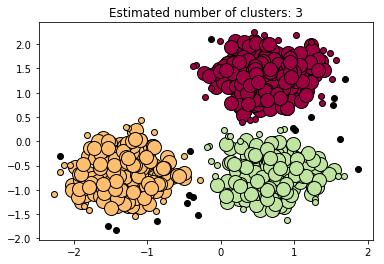

In [2]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
1000025    698 non-null int64
5          698 non-null int64
1          698 non-null int64
1.1        698 non-null int64
1.2        698 non-null int64
2          698 non-null int64
1.3        698 non-null object
3          698 non-null int64
1.4        698 non-null int64
1.5        698 non-null int64
2.1        698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4

In [8]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Automatically created module for IPython interactive environment


In [9]:
print X

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ..., 
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]
